In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
df = pd.read_csv(r"Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df=df.iloc[:,2:]

In [7]:
df.sample(5)

,Age,EstimatedSalary,Purchased
23,45,22000,1
147,41,30000,0
91,30,116000,0
127,26,32000,0
95,35,44000,0


In [9]:
# Train test split 
X=df.drop('Purchased',axis=1)
y=df['Purchased']

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0) 
X_train.shape,X_test.shape

((280, 2), (120, 2))

In [13]:
# Standard scaler 


In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [64]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns) 
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [27]:
X_train.describe().round(1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [25]:
X_train_scaled.describe().round(1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [29]:
# Effect of Scailing 

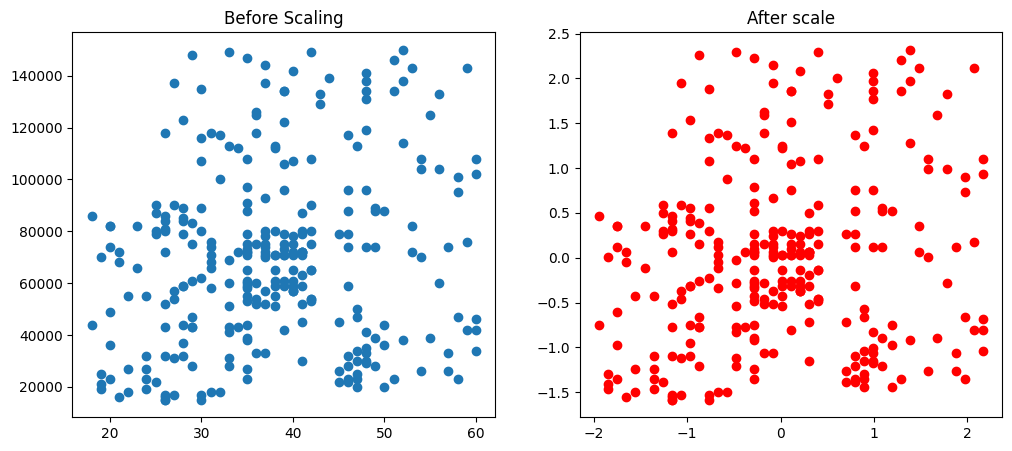

In [33]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After scale")
plt.show()

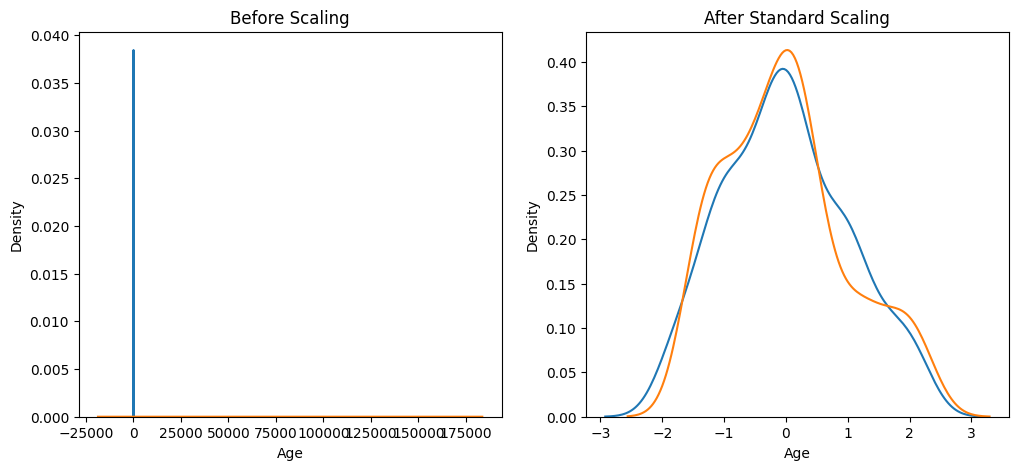

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

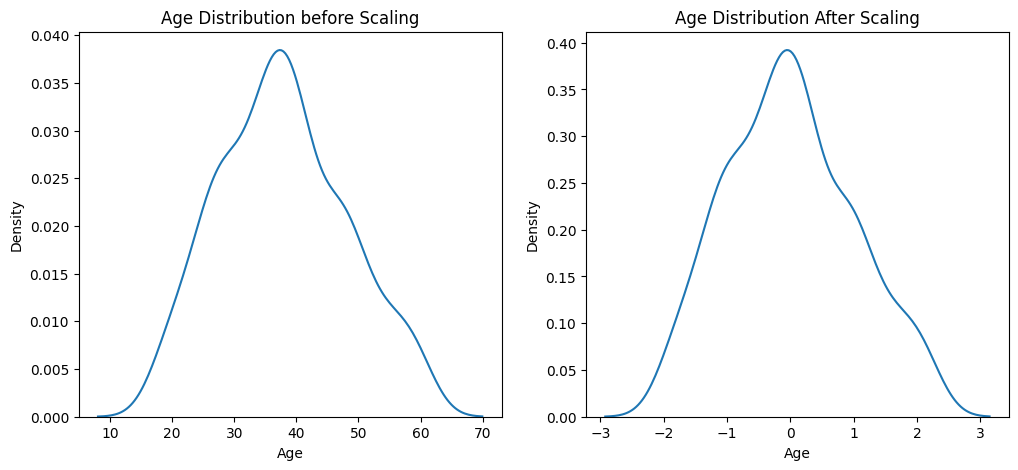

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling 
ax1.set_title("Age Distribution before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)

# after scaling 
ax2.set_title("Age Distribution After Scaling") 
sns.kdeplot(X_train_scaled['Age'],ax=ax2)

plt.show()

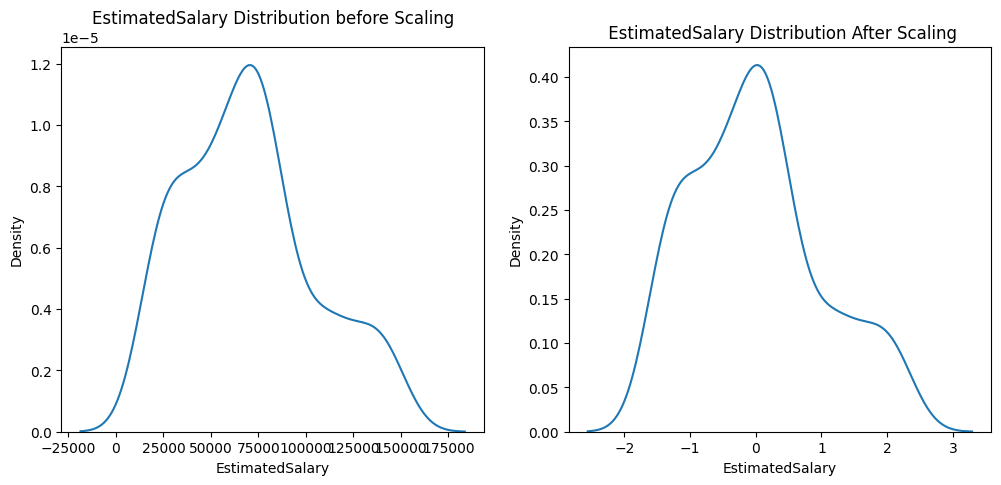

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling 
ax1.set_title("EstimatedSalary Distribution before Scaling")
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

# after scaling 
ax2.set_title(" EstimatedSalary Distribution After Scaling") 
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

In [44]:
# Why Scaling important? 

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [48]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [56]:
lr.fit(X_train,y_train)
# lr.score(X_test,y_test)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.875

In [58]:
lr_scaled.fit(X_train_scaled,y_train)
# lr_scaled.score(X_test_scaled,y_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)
accuracy_score(y_test,y_pred_scaled)

0.8666666666666667

In [67]:
# Effect of Outlier 

In [75]:
df = pd.concat([df,pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})],axis=0)
df=df.reset_index()
df

,index,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,3,27,57000,0
4,4,19,76000,0
...,...,...,...,...
404,1,90,250000,1
405,2,95,350000,1
406,0,5,1000,0
407,1,90,250000,1


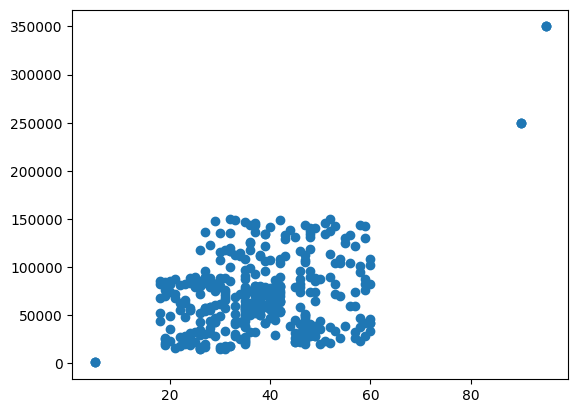

In [77]:
plt.scatter(df['Age'],df['EstimatedSalary'])